<a href="https://colab.research.google.com/github/Shradha1304/Ml_projects/blob/main/email_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classify the email using the binary classification method. Email Spam detection has two
states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors and
Support Vector Machine for classification. Analyze their performance.

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("emails.csv")

In [ ]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [ ]:
df.shape

(5172, 3002)

In [ ]:
x=df.iloc[:,1:3001]

In [ ]:
print(x)

      the  to  ect  and  for  of    a  you  hou  in  ...  enhancements  \
0       0   0    1    0    0   0    2    0    0   0  ...             0   
1       8  13   24    6    6   2  102    1   27  18  ...             0   
2       0   0    1    0    0   0    8    0    0   4  ...             0   
3       0   5   22    0    5   1   51    2   10   1  ...             0   
4       7   6   17    1    5   2   57    0    9   3  ...             0   
...   ...  ..  ...  ...  ...  ..  ...  ...  ...  ..  ...           ...   
5167    2   2    2    3    0   0   32    0    0   5  ...             0   
5168   35  27   11    2    6   5  151    4    3  23  ...             0   
5169    0   0    1    1    0   0   11    0    0   1  ...             0   
5170    2   7    1    0    2   1   28    2    0   8  ...             0   
5171   22  24    5    1    6   5  148    8    2  23  ...             0   

      connevey  jay  valued  lay  infrastructure  military  allowing  ff  dry  
0            0    0       0    

In [ ]:
y=df.iloc[:,-1].values

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)

In [ ]:
svc=SVC(C=1.0,kernel='rbf',gamma='auto')
svc.fit(xtrain,ytrain)

SVC(gamma='auto')

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_1=svc.predict(xtest)

In [ ]:
y_pred_2=knn.predict(xtest)
print(y_pred_2)

[0 1 0 ... 0 0 1]


In [ ]:
print("accuracy of svm :",accuracy_score(y_pred_1,ytest))

accuracy of svm : 0.9010054137664346


In [ ]:
print("accuracy of knn:",knn.score(xtest,ytest))

accuracy of knn: 0.8561484918793504


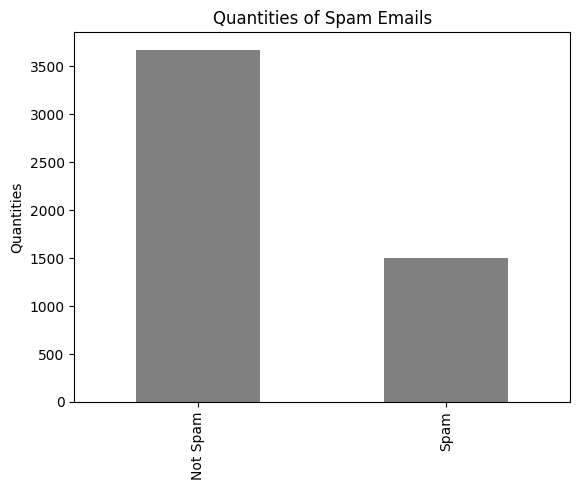

In [ ]:
val = df['Prediction'].value_counts()
val.plot(kind='bar', color='gray')
plt.xlabel('')
plt.ylabel('Quantities')
plt.title('Quantities of Spam Emails')
plt.xticks([0,1],['Not Spam','Spam'])
plt.show()